## Pandas

`Pandas is built on numpy and matplotlib libraries`
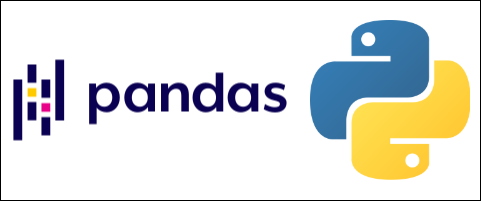

### Intallation

``` python
    ## using pip
    pip install pandas
    
    ## using conda
    conda install pandas
    
    ## Further
    pip install --upgrade pandas==1.3.4 --user

```

In [ ]:
## Let's import the library
import pandas as pd

In [ ]:
pd.__version__

### DataFrame

### `Reading and some Statistics`

In [ ]:
## read csv files using pandas
df_home = pd.read_csv('D:/Data science/Coding/Ml coding/SalaryData.csv')

## show only the head-- default 5 rows -- This Tabular Data called (DataFrame)
df_home.head()

In [ ]:
## Let's see some information about this Dataset
df_home.info()        ## We found some important information here

In [ ]:
## what about shape of this Dataset
df_home.shape              ## 51 instance & 6 features

In [ ]:
## What about some statistics about Dataset
df_home.describe()

In [ ]:
## Get Rows of this Dataset in numpy array
df_home.values

In [ ]:
## Get Columns names
df_home.columns

In [ ]:
## Get Indecies of The Dataset
df_home.index

### `Sorting`

In [ ]:
## Sort by Values  (talking about --> ascending & inplace)
df_home_sorted = df_home.sort_values(by='Software Engineer',ascending=False)

## Get the Head of sorted  DataFrame
df_home_sorted.head()

In [ ]:
## Sort by more than one Value
df_home_sorted = df_home.sort_values(by=['individuals', 'family_members'], ascending=[False, True])

## Get the Head of sorted DataFrame
df_home_sorted.head()

### `Subsetting Columns`

In [ ]:
## Get only specified column or columns (Series)
df_home_sorted['region']  ## or  --> df_home_sorted.region

In [ ]:
## Get only specified column or columns
df_home_sorted[['region', 'individuals']]

In [ ]:
## Subsetting Rows

## returns boolean series 
df_home_sorted[df_home_sorted['family_members']<6000]

In [ ]:
## Subset Rows according to condition

## returns boolean series 
df_home_sorted[df_home_sorted['region']=='South Atlantic']

In [ ]:
## Subset Rows according to condition

## returns boolean series 
df_home_sorted[df_home_sorted['region']=='Pacific']

In [ ]:
## Subset Rows according to condition

## returns boolean series 
df_home_sorted[df_home_sorted['individuals']>16424]

In [ ]:
## Subset Rows according to more than one condition  (and)

## returns boolean series 
df_home_sorted[(df_home_sorted['region']=='Pacific') & (df_home_sorted['individuals']>16424)]

In [ ]:
## Subset Rows according to more than one condition (or)

## returns boolean series 
df_home_sorted[(df_home_sorted['region']=='Pacific') | (df_home_sorted['individuals']>16424)]

In [ ]:
## Subsetting using (isin) function
lst_region = ['Pacific', 'South Atlantic', 'West South Central']

## Return boolean series then subset rows which only are True
df_home_sorted[df_home_sorted['region'].isin(lst_region)]

### `Adding new columns`

In [ ]:
## What about creating a new column which is equal (state_pop / family_members)

df_home_sorted['new_col'] = df_home_sorted['state_pop']/df_home_sorted['family_members']

## check again
df_home_sorted.head()

### `Summary Statistics for numerical Data`

In [ ]:
## Get some statitics for numerical columns (mean and std)
df_home_sorted['individuals'].mean(), df_home_sorted['individuals'].std()

In [ ]:
## Get some statitics for numerical  (median and variance)
df_home_sorted['individuals'].median(), df_home_sorted['individuals'].var()

In [ ]:
## Get some statitics for numerical  (max and min)
df_home_sorted['individuals'].max(), df_home_sorted['individuals'].min()

In [ ]:
## quantiles - @ 50% == Median
df_home_sorted['individuals'].quantile(0.5), df_home_sorted['individuals'].quantile(0.3)

In [ ]:
## quantiles - @ 50% == Median
df_home_sorted[['individuals', 'family_members']].quantile(0.3)

In [ ]:
## Cumsum & cumproduct & cummax & cummin
df_home_sorted['individuals'].cumsum()

### `Counting`

In [ ]:
## get duplicates
df_home_sorted[df_home_sorted.duplicated(subset=['region'])]

In [ ]:
## what about dropping dublicates in region column (just a Demo)
unique_regions = df_home_sorted.drop_duplicates(subset=['region'], keep='first')

## let's see again
unique_regions

In [ ]:
## what about dropping dublicates in region column (just a Demo)
unique_regions = df_home_sorted.drop_duplicates(subset=['region', 'state'], keep='first')

## let's see again
unique_regions

In [ ]:
## check unique values for specific column --> return numpy array
pd.unique(df_home_sorted['region'])

In [ ]:
## counting --> Try play with these arguments (False is default for both except sort)
df_home_sorted['region'].value_counts(normalize=False, ascending=False, sort=True)

### `Summarizing by Group`

In [ ]:
## Ex: what about getting the mean of family_members for each region
df_home_sorted['region'].unique()

In [ ]:
## get mean for family_members for each region separately ---> very exaustivae and not smart
df_home_sorted[df_home_sorted['region']=='Pacific']['family_members'].mean(), \
df_home_sorted[df_home_sorted['region']=='Mid-Atlantic']['family_members'].mean(), \
df_home_sorted[df_home_sorted['region']=='South Atlantic']['family_members'].mean(), \
df_home_sorted[df_home_sorted['region']=='West South Central']['family_members'].mean(), \
df_home_sorted[df_home_sorted['region']=='Mountain']['family_members'].mean(), \
df_home_sorted[df_home_sorted['region']=='East North Central']['family_members'].mean(), \
df_home_sorted[df_home_sorted['region']=='New England']['family_members'].mean(), \
df_home_sorted[df_home_sorted['region']=='East South Central']['family_members'].mean(), \
df_home_sorted[df_home_sorted['region']=='West South Central']['family_members'].mean()

In [ ]:
## what about group by
df_home_sorted.groupby(by='region')['family_members'].mean()

In [ ]:
## what about more aggregate functions 
## Method 1

## reset_index() --> try discover by yourself by playing with code
df_home_sorted.groupby(by='region')['family_members'].agg([max, min, sum]).reset_index()

In [ ]:
## what about more aggregate functions 
## Method 2

## reset_index() --> try discover by yourself by playing with code
df_home_sorted.groupby(by='region')['family_members'].agg({'max', 'min', 'sum', 'mean'}).reset_index()

In [ ]:
## group by more than one column

## what about more aggregate functions 
## Method 2

## reset_index() --> try discover by yourself by playing with code
df_home_sorted.groupby(by=['region', 'state'])[['family_members', 'individuals']].agg({'max', 'min', 'mean'})

###  `Pivot Table`

In [ ]:
## Create what we have done above using pivot_table
df_home_sorted.pivot_table(values='family_members', 
                           index=['region', 'state'], 
                           aggfunc=['max', 'min', 'mean'])

In [ ]:
## remmber pivot table
df_home_sorted.pivot_table(index='region').mean(axis=0)  ## or axis='index'

In [ ]:
## remmber pivot table
df_home_sorted.pivot_table(index='region').mean(axis=1)   ## or axis='columns'

### `Setting an Index`

In [ ]:
## make region column as an Index --> that helps much in searching and make it faster and smart

## discover what (inplace) parameter does 
## --> override the variable instead of assigning it again to the same variable name
df_home_indexed = df_home_sorted.set_index('region')

df_home_indexed.head()

In [ ]:
## removing an Index
df_home_indexed.reset_index()

In [ ]:
## But why make Indexing --> 
## It makes subsetting much more easier, faster and smart
df_home_indexed.head()

In [ ]:
## usin loc & iloc
df_home_indexed.loc[['Pacific', 'Mid-Atlantic']]

### `Let's make a smart compare between them`
`df_home_indexed & df_home_sorted`

`Indexing is much much faster and smarter --> specially for big data (millions of instances)`

In [ ]:
import time

In [ ]:
## using traditional method
start_time = time.time()

## get the dataframe as we did before
without_indexing = df_home_sorted[df_home_sorted['region'].isin(['Pacific', 'Mid-Atlantic'])]

## get the time after finishing the above process
end_time = time.time()

## subset the time at the end from start
time_without = end_time - start_time
time_without   ## this time is for processing the output using traditional method (without indexing)

In [ ]:
## using indexing method ('region') as an Index
start_time = time.time()

## get the dataframe as we did before
with_indexing = df_home_indexed.loc[['Pacific', 'Mid-Atlantic']]

## get the time after finishing the above process
end_time = time.time()

## subset the time at the end from start
time_with = end_time - start_time
time_with   

In [ ]:
## you can make more than one index and it can by not unique
df_home_multiIndex = df_home_sorted.set_index(['region', 'state'])

df_home_multiIndex.head()

In [ ]:
## But how to subset from multiIndex --> Thinking ??!! 

## This is called (outer subsetting) because it only takes the outer Index
df_home_multiIndex.loc[['Pacific', 'South Atlantic']]

In [ ]:
## But how to subset from multiIndex --> Thinking ??!! 

## This is called (Inner subsetting) because it  takes the outer & Inner Index
## Give it a tuple --> each tuple contains (outer_index, inner_index)
df_home_multiIndex.loc[[('Pacific', 'California'), ('South Atlantic', 'North Carolina')]]

In [ ]:
## sorting by Index
df_home_indexed.sort_index(level='region', ascending=False)

### `Using .loc and .iloc`

`.loc --> takes a strings `  <br />
` .iloc --> takes an index `

In [ ]:
### Remember slicing
breeds = ["Labrador", "Poodle",
            "Chow Chow", "Schnauzer",
            "Labrador", "Chihuahua",
            "St. Bernard"]

breeds[1:5]

In [ ]:
## sort using index in descendign order
df_home_indexed = df_home_indexed.sort_index(level='region', ascending=False)

df_home_indexed

`.loc`

In [ ]:
## using loc to slice only some rows
## note that using loc (end is inclusive) but in lists and numpy (end is exclusive)
df_home_indexed.loc['West South Central':'Mountain']

In [ ]:
## what about slicing some columns with slicing of these ros
df_home_indexed.loc['West South Central':'Mountain', 'state':'family_members']

`.iloc`

In [ ]:
## using iloc to slice some rows
df_home_indexed.iloc[5:15]

In [ ]:
## using iloc to slice some rows and columns
df_home_indexed.iloc[5:15, :3]          ## (end is exclusive)

In [ ]:
## remmber pivot table
df_home_indexed.pivot_table(index='region').mean(axis=0)  ## or axis='index'

In [ ]:
## remmber pivot table
df_home_indexed.pivot_table(index='region').mean(axis=1)   ## or axis='columns'

### Visualization using pandas

#### `Histogram`  

`is preferable to be done for numerical continuous Data`

In [ ]:
## show histogram of individuals
df_home['individuals'].hist(bins=30);

In [ ]:
## show histogram of individuals
df_home['family_members'].hist(bins=30);

### `Bar plot`

In [ ]:
## Bar plot for category data
df_home['region'].value_counts().plot(kind='bar');

### `Scatter plot`

In [ ]:
## scatter plot between two numerical features
df_home.plot(kind='scatter', x='state_pop', y='family_members');

### `Line plot`

In [ ]:
## scatter plot between two numerical features
## Try playing with these parameters and more
df_home_sorted.plot(kind='line', x='region', y='family_members', rot=45, 
                    xlabel='region', ylabel='family_members', legend=False);

### `Dealing with missing Data`

example
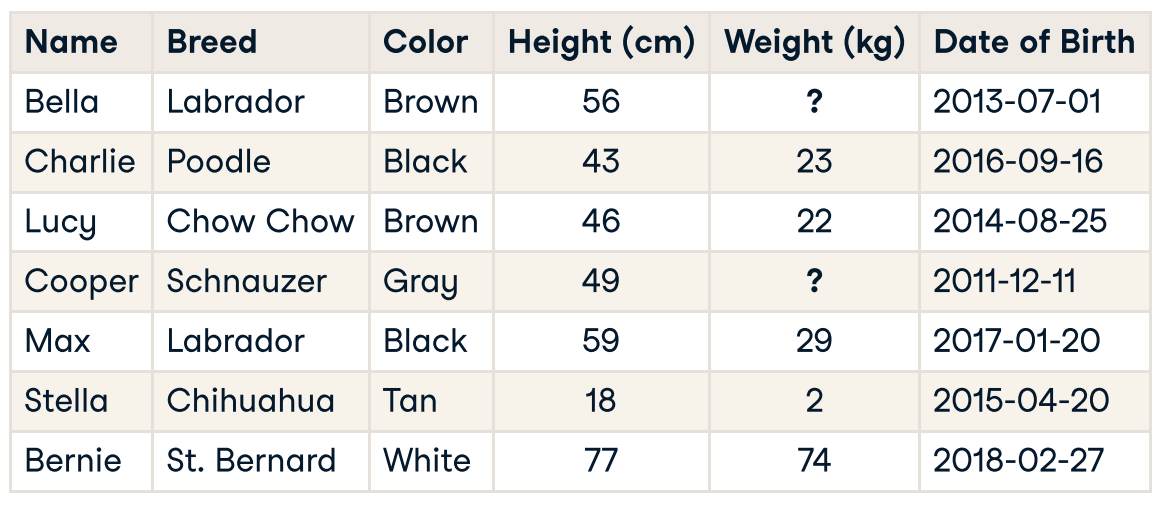

### Dealing with New Dataset

In [ ]:
## read the dataset
df_housing = pd.read_csv('files/housing.csv')

## show the head
df_housing.head()

In [ ]:
## check null
df_housing.isna().any()

In [ ]:
## get the sum of null data for each feature
df_housing.isna().sum()

In [ ]:
## Get the rows where total_bedrooms is nan
df_housing[df_housing['total_bedrooms'].isna()]

In [ ]:
## get the sum of null data for each feature
df_housing.isna().sum().plot(kind='bar');

### `Using missingno library`

`A library is used to visualize missing values in DataFrame`

In [ ]:
import missingno as msno

In [ ]:
## Method 1

msno.matrix(df_housing);

In [ ]:
## Method 2

msno.bar(df_housing);

### How to deal with missing data

` 1. Drop nans for these featurse (limited)` <br />
` 2. Imputing (filling nans) by [mean or median or mode or specific value]` <br />
` 3. Drop the whole feature`

In [ ]:
## Let's try both methods

## Let's check the shape before dropping
df_housing.shape

`1. Drop nans for these features`

In [ ]:
## drop nans
## Note these parameters carefully 
## --> subset (desired columns), if not specified it will be for all columns

df_housing_dropped = df_housing.dropna(subset=['total_bedrooms'], axis=0)

## shape after dropping
df_housing_dropped.shape

`2. Imputing using mean`

In [ ]:
## Note that here we only have missing value in numerical feature
## so Impute the value with its mean (for example)
## take care if you have missing value in categorical column, there is no mean it isn't numerical
## we will spend much time dealing with these problems in Machine learning phase (don't worry)

df_housing.fillna(value=df_housing['total_bedrooms'].mean())

### `Creating a DataFrame`

In [ ]:
## create a dataframe

my_df = pd.DataFrame({'Name': ['Mohammed Agoor', 'Mohammed Alaa', 'Mostafa Ahmed'], 
                      'Age': [25, 28, 29], 
                      'Job': ['ML Engineer', 'Software Developper', 'Civil Enginner']})
my_df

In [ ]:
## What about saving this dataframe to my computer in desired format (CVS, Json .... etc)
my_df.to_csv('files/my_df.csv')

### Done!

----